In [ ]:
library(ISLR)
library(gam)
library(splines)
library(tidyverse)
library(caret)
library(leaps)
library(corrplot)
library(ggplot2)
library(dplyr)
library(gam)
library(glmnet)
library(pROC)
library(MASS)
library(randomForest)
library(factoextra)
library(AICcmodavg)


Attaching package: 'AICcmodavg'


The following object is masked from 'package:randomForest':

    importance




READ THE DATA

In [ ]:
data = read.csv("../data/clean_data/final.csv")

In [ ]:
head(data)

,HDI.Rank,Country,Gender.Inequality.Index.Value,Gender.Inequality.Index.Rank,Maternal.Mortality.Ratio,Adolescent.Birth.Rate,Women.Share.of.Seats.in.Parliament,Female.Population.with.Some.Secondary.Education,Male.Population.with.Some.Secondary.Education,Female.Labour.Force.Participation.Rate,Male.Labour.Force.Participation.Rate
,<dbl>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Switzerland,0.018,3,5,2.2,39.8,96.9,97.5,61.7,72.7
2,2,Norway,0.016,2,2,2.3,45.0,99.1,99.3,60.3,72.0
3,3,Iceland,0.043,8,4,5.4,47.6,99.8,99.7,61.7,70.5
4,4,"Hong Kong, China (SAR)",0.000,0,0,1.6,0.0,77.1,83.4,53.5,65.8
5,5,Australia,0.073,19,6,8.1,37.9,94.6,94.4,61.1,70.5
6,6,Denmark,0.013,1,4,1.9,39.7,95.1,95.2,57.7,66.7


In [ ]:
# RENAME THE COLUMNS 
data = data %>% rename(
    "HDI_Rank" = "HDI.Rank",
    "Gender_Inequality_Index_Value" = "Gender.Inequality.Index.Value",
    "Gender_Inequality_Index_Rank" = "Gender.Inequality.Index.Rank",
    "Maternal_Mortality_Ratio" = "Maternal.Mortality.Ratio",
    "Adolescent_Birth_Rate" = "Adolescent.Birth.Rate",
    "Women_share_of_Seats_in_Parliament" = "Women.Share.of.Seats.in.Parliament",
    "Female_Population_with_Some_Secondary_Education" = "Female.Population.with.Some.Secondary.Education",
    "Male_Population_with_Some_Secondary_Education" = "Male.Population.with.Some.Secondary.Education",
    "Female_Labour_Force_Participation_Rate" = "Female.Labour.Force.Participation.Rate",
    "Male_Labour_Force_Participation_Rate" = "Male.Labour.Force.Participation.Rate"
)


In [ ]:
#replace na with mean
data$Maternal_Mortality_Ratio[is.na(data$Maternal_Mortality_Ratio)] = mean(data$Maternal_Mortality_Ratio, na.rm = TRUE)

In [ ]:
# CORRELATION MATRIX
numeric_data = data %>% select_if(is.numeric)
corr_matrix = cor(numeric_data)

corr_matrix

,HDI_Rank,Gender_Inequality_Index_Value,Gender_Inequality_Index_Rank,Maternal_Mortality_Ratio,Adolescent_Birth_Rate,Women_share_of_Seats_in_Parliament,Female_Population_with_Some_Secondary_Education,Male_Population_with_Some_Secondary_Education,Female_Labour_Force_Participation_Rate,Male_Labour_Force_Participation_Rate
HDI_Rank,1.00000000,0.7514582,0.7549718,0.6688352,0.7634002,-0.24772349,-0.6525573,-0.5945172,0.09740211,0.15353006
Gender_Inequality_Index_Value,0.75145823,1.0000000,0.9976621,0.6084885,0.6584749,-0.23457433,-0.3564104,-0.2720597,0.23052301,0.42532331
Gender_Inequality_Index_Rank,0.75497181,0.9976621,1.0000000,0.6231101,0.6709990,-0.23245900,-0.3603170,-0.2739976,0.24111702,0.42413094
Maternal_Mortality_Ratio,0.66883515,0.6084885,0.6231101,1.0000000,0.7372338,-0.15209160,-0.5874916,-0.5208702,0.24240635,0.19234246
Adolescent_Birth_Rate,0.76340020,0.6584749,0.6709990,0.7372338,1.0000000,-0.10386621,-0.6024250,-0.5440827,0.21826712,0.15983100
Women_share_of_Seats_in_Parliament,-0.24772349,-0.2345743,-0.2324590,-0.1520916,-0.1038662,1.00000000,0.1693096,0.1702654,0.21279477,0.06542927
Female_Population_with_Some_Secondary_Education,-0.65255733,-0.3564104,-0.3603170,-0.5874916,-0.6024250,0.16930960,1.0000000,0.9787175,0.10929913,0.15879261
Male_Population_with_Some_Secondary_Education,-0.59451722,-0.2720597,-0.2739976,-0.5208702,-0.5440827,0.17026537,0.9787175,1.0000000,0.15219099,0.20248229
Female_Labour_Force_Participation_Rate,0.09740211,0.2305230,0.2411170,0.2424064,0.2182671,0.21279477,0.1092991,0.1521910,1.00000000,0.75423320
Male_Labour_Force_Participation_Rate,0.15353006,0.4253233,0.4241309,0.1923425,0.1598310,0.06542927,0.1587926,0.2024823,0.75423320,1.00000000


The two clumns `Gender_Inequality_Index_Value` and `Gender_Inequality_Index_Rank` are extremely correlated. We will drop the `Gender_Inequality_Index_Rank` column.

In [ ]:
# drop Gender_Inequality_Index_Rank column and HDI_Rank column

data = subset(data, select = -c(HDI_Rank))
data = subset(data, select = -c(Gender_Inequality_Index_Rank))

In [ ]:
data_std = data %>% select_if(is.numeric) %>% scale(center = TRUE, scale = TRUE)
data_std = data.frame(data_std)

In [ ]:
#split data into train and test

set.seed(123)
sample = sample(c(TRUE, FALSE), nrow(data_std), replace=TRUE, prob=c(0.7,0.3))
train = data_std[sample,]
test = data_std[!sample,]

LINEAR REGRESSION MODELS

In [244]:
#linear regression model

lm_data = lm(Gender_Inequality_Index_Value ~ ., data = train)
summary(lm_data)


Call:
lm(formula = Gender_Inequality_Index_Value ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9186 -0.2699 -0.0143  0.2880  2.1577 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                      0.02451    0.04585   0.534
Maternal_Mortality_Ratio                         0.27203    0.07377   3.687
Adolescent_Birth_Rate                            0.49544    0.07442   6.658
Women_share_of_Seats_in_Parliament              -0.10988    0.04874  -2.254
Female_Population_with_Some_Secondary_Education -0.73778    0.27517  -2.681
Male_Population_with_Some_Secondary_Education    0.82323    0.26275   3.133
Female_Labour_Force_Participation_Rate          -0.37170    0.07466  -4.979
Male_Labour_Force_Participation_Rate             0.54533    0.07381   7.388
                                                Pr(>|t|)    
(Intercept)                                      0.59393    
Maternal_Mortali

RMSE for linear regression model is:  0.7298689

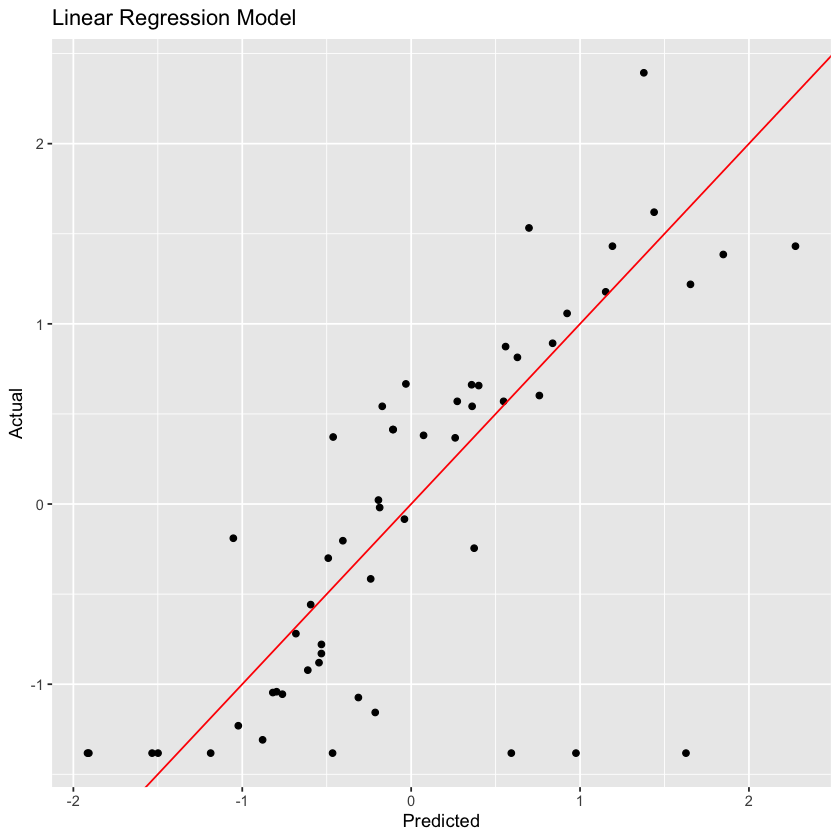

In [245]:

#predict on test data
lm_pred = predict(lm_data, test)


ggplot()+
geom_point(aes(x = lm_pred, y = test$Gender_Inequality_Index_Value)) +
geom_abline(intercept = 0, slope = 1, color = "red") +
labs(title = "Linear Regression Model", x = "Predicted", y = "Actual")

#calculate rmse
lm_rmse = sqrt(mean((test$Gender_Inequality_Index_Value - lm_pred)^2))
cat("RMSE for linear regression model is: ", lm_rmse)


In [246]:
sum(is.na(lm_pred))

[1] 0

In [247]:
#AIC, BIC and adjusted R-squared for linear regression model

lm_aic = AIC(lm_data)
lm_bic = BIC(lm_data)
lm_adj_r2 = summary(lm_data)$adj.r.squared

cat(" AIC for linear regression model is: ", lm_aic, "\n", "BIC for linear regression model is: ", lm_bic, "\n", "Adjusted R-squared for linear regression model is: ", lm_adj_r2)

 AIC for linear regression model is:  234.0799 
 BIC for linear regression model is:  260.5547 
 Adjusted R-squared for linear regression model is:  0.7049286

In [248]:
#Subset selection

#best subset selection
best_model = regsubsets(Gender_Inequality_Index_Value ~ ., data = train, nvmax = 8)

In [249]:
summary_best_model = summary(best_model)

In [250]:
summary_best_model

Subset selection object
Call: regsubsets.formula(Gender_Inequality_Index_Value ~ ., data = train, 
    nvmax = 8)
7 Variables  (and intercept)
                                                Forced in Forced out
Maternal_Mortality_Ratio                            FALSE      FALSE
Adolescent_Birth_Rate                               FALSE      FALSE
Women_share_of_Seats_in_Parliament                  FALSE      FALSE
Female_Population_with_Some_Secondary_Education     FALSE      FALSE
Male_Population_with_Some_Secondary_Education       FALSE      FALSE
Female_Labour_Force_Participation_Rate              FALSE      FALSE
Male_Labour_Force_Participation_Rate                FALSE      FALSE
1 subsets of each size up to 7
Selection Algorithm: exhaustive
         Maternal_Mortality_Ratio Adolescent_Birth_Rate
1  ( 1 ) " "                      "*"                  
2  ( 1 ) " "                      "*"                  
3  ( 1 ) " "                      "*"                  
4  ( 1 ) "*"      

In [251]:
min_bic_model = which.min(summary_best_model$bic)
max_r2_model = which.max(summary_best_model$adjr2)
min_cp_model = which.min(summary_best_model$cp)

In [252]:
cat(" Best subset selection model with minimum BIC has", min_bic_model, "predictors \n", "Best subset selection model with maximum adjusted R-squared has", max_r2_model, "predictors\n", "Best subset selection model with minimum Cp has", min_cp_model, "predictors")

 Best subset selection model with minimum BIC has 7 predictors 
 Best subset selection model with maximum adjusted R-squared has 7 predictors
 Best subset selection model with minimum Cp has 7 predictors

We will choose the model with 8 predictors

In [253]:
#forward stepwise selection

intercept_only = lm(Gender_Inequality_Index_Value ~ 1, data = train)
all = lm(Gender_Inequality_Index_Value ~ ., data = train)
forward_model = step(intercept_only, direction='forward', scope = formula(all), trace = 0)

In [254]:
forward_model$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,139,136.92084,-1.113528
+ Adolescent_Birth_Rate,-1,66.927155,138,69.99368,-93.053240
+ Male_Labour_Force_Participation_Rate,-1,12.801051,137,57.19263,-119.330428
+ Female_Labour_Force_Participation_Rate,-1,8.316252,136,48.87638,-139.328743
+ Maternal_Mortality_Ratio,-1,5.710732,135,43.16565,-154.723639
+ Male_Population_with_Some_Secondary_Education,-1,1.379493,134,41.78616,-157.270829
+ Female_Population_with_Some_Secondary_Education,-1,1.942224,133,39.84393,-161.934124
+ Women_share_of_Seats_in_Parliament,-1,1.477108,132,38.36682,-165.222901


In [255]:
forward_model$coefficients

(Intercept) 
                                      0.0245057 
                          Adolescent_Birth_Rate 
                                      0.4954379 
           Male_Labour_Force_Participation_Rate 
                                      0.5453307 
         Female_Labour_Force_Participation_Rate 
                                     -0.3717022 
                       Maternal_Mortality_Ratio 
                                      0.2720331 
  Male_Population_with_Some_Secondary_Education 
                                      0.8232349 
Female_Population_with_Some_Secondary_Education 
                                     -0.7377824 
             Women_share_of_Seats_in_Parliament 
                                     -0.1098819

In [256]:
#predicting using the best model

forward_pred = predict(forward_model, test)


In [257]:
#calculate rmse
forward_rmse = sqrt(mean((test$Gender_Inequality_Index_Value - forward_pred)^2))
cat("RMSE for forward stepwise selection model is: ", forward_rmse)

RMSE for forward stepwise selection model is:  0.7298689

In [258]:
backward = step(all, direction='backward', scope=formula(all), trace=0)

In [259]:
backward_model$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,131,32.88848,-184.7928


In [260]:
backward$coefficients

(Intercept) 
                                      0.0245057 
                       Maternal_Mortality_Ratio 
                                      0.2720331 
                          Adolescent_Birth_Rate 
                                      0.4954379 
             Women_share_of_Seats_in_Parliament 
                                     -0.1098819 
Female_Population_with_Some_Secondary_Education 
                                     -0.7377824 
  Male_Population_with_Some_Secondary_Education 
                                      0.8232349 
         Female_Labour_Force_Participation_Rate 
                                     -0.3717022 
           Male_Labour_Force_Participation_Rate 
                                      0.5453307

In [261]:
#predicting using backward model

backward_pred = predict(backward, test)

#calculate rmse
backward_rmse = sqrt(mean((test$Gender_Inequality_Index_Value - backward_pred)^2))
cat("RMSE for backward stepwise selection model is: ", backward_rmse)

RMSE for backward stepwise selection model is:  0.7298689

Since our data is correlated, we will use Ridge Regression to avoid overfitting.

In [262]:
#creating a model matrix

X = model.matrix(Gender_Inequality_Index_Value ~., data = train)
Y = train$Gender_Inequality_Index_Value

#Fit ridge regression model using cross-validation to find lambda
fit_ridge = cv.glmnet(X, Y, alpha = 0, lambda = NULL, type.measure = "mse")

[1] 0.6448135

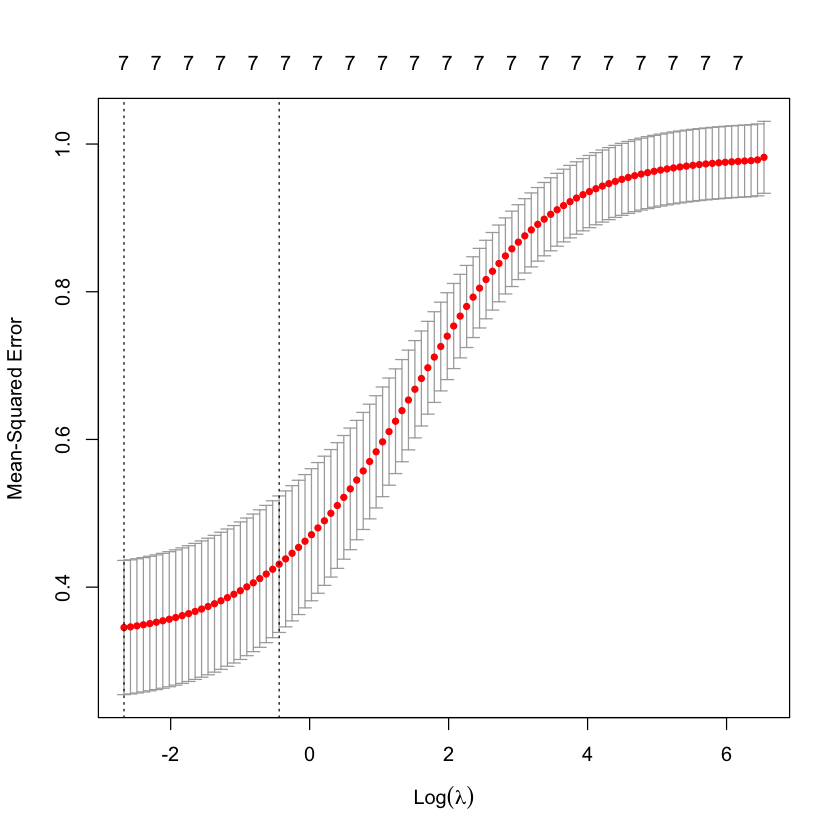

In [263]:
lambda_1se = fit_ridge$lambda.1se
lambda_1se
#using optimal lambda to fit the model
fit_ridge_ftse = glmnet(X, Y, alpha = 0, lambda = lambda_1se)
#plot the model
plot(fit_ridge)

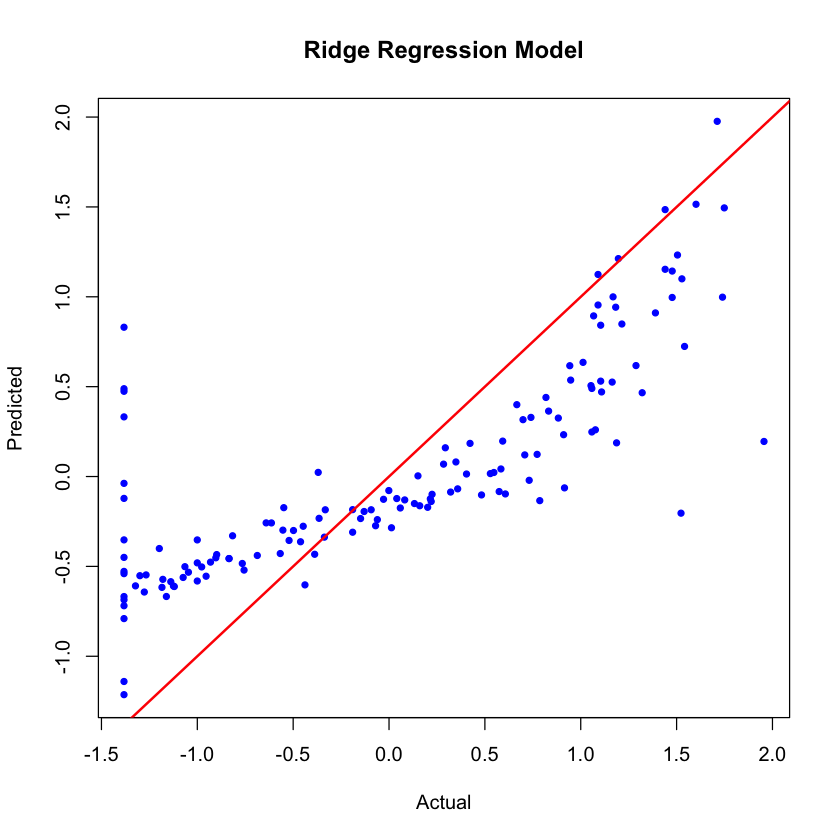

In [264]:
plot(train$Gender_Inequality_Index_Value, predict(fit_ridge_ftse, X), xlab = "Actual", ylab = "Predicted", col = "blue", pch = 20, title(main = "Ridge Regression Model"))
abline(0, 1, col = "red", lwd = 2)


In [ ]:
#predicting using ridge regression model

ridge_pred = predict(fit_ridge_ftse, X)

#calculate rmse
ridge_rmse = sqrt(mean((train$Gender_Inequality_Index_Value - ridge_pred)^2))

cat("RMSE for ridge regression model is: ", ridge_rmse)

RMSE for ridge regression model is:  0.6027686

LASSO REGRESSION

In [ ]:
#lasso regression

lasso_fit = cv.glmnet(X, Y, alpha = 1, lambda = NULL, type.measure = "mse", standardize = FALSE)

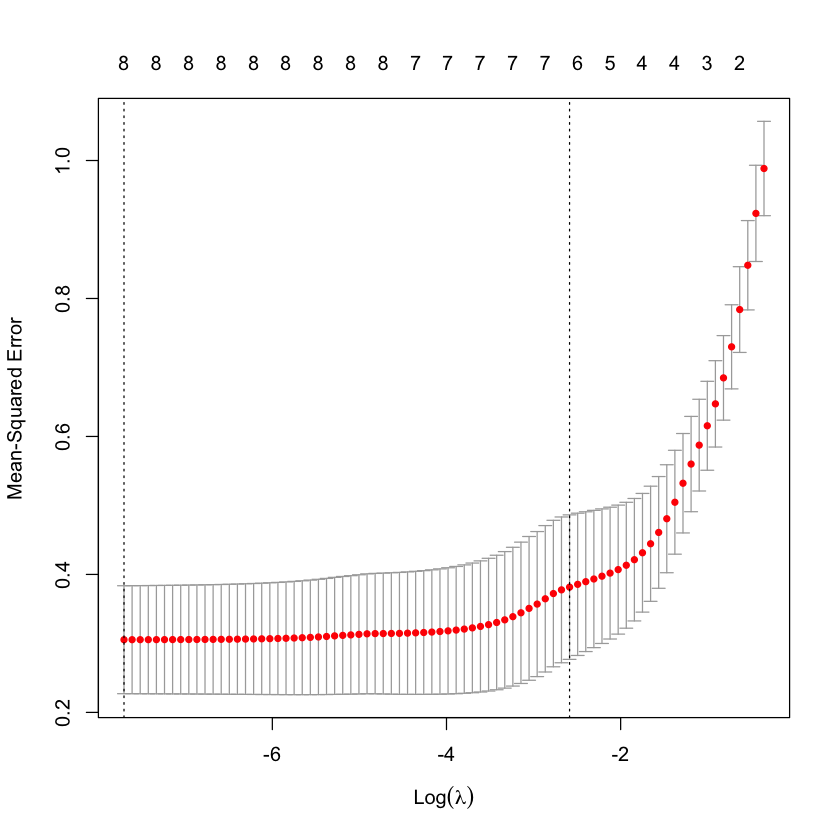

In [ ]:
#plot lasso regularization path
plot(lasso_fit)

In [ ]:
#coefficient estimates for this model:

coef(lasso_best_model)

10 x 1 sparse Matrix of class "dgCMatrix"
                                                         s0
(Intercept)                                      0.00326108
(Intercept)                                      .         
HDI_Rank                                         0.39875387
Maternal_Mortality_Ratio                         0.18746643
Adolescent_Birth_Rate                            0.32479103
Women_share_of_Seats_in_Parliament              -0.08305582
Female_Population_with_Some_Secondary_Education -0.55799572
Male_Population_with_Some_Secondary_Education    0.76462153
Female_Labour_Force_Participation_Rate          -0.30217793
Male_Labour_Force_Participation_Rate             0.48029271

There was no need to shrink the coefficients to zero, in our model.

In [ ]:
#using the best model to make predictions

lasso_pred = predict(lasso_best_model, X)

In [ ]:
#calculate rmse
lasso_rmse = sqrt(mean((train$Gender_Inequality_Index_Value - lasso_pred)^2))
cat("RMSE for lasso regression model is: ", lasso_rmse)

RMSE for lasso regression model is:  0.484732

RANDOM FOREST

In [ ]:
#Random Forest

df = data

In [ ]:
# Split the dataset into train, dev, and test sets with a 70/15/15 ratio
set.seed(42)
train_index <- sample(nrow(df), round(0.7*nrow(df)), replace=FALSE)
dev_test <- setdiff(1:nrow(df), train_index)
dev_index <- sample(dev_test, round(0.5*length(dev_test)), replace=FALSE)
test_index <- setdiff(dev_test, dev_index)
X_train <- df[train_index, -which(names(df)=="Gender_Inequality_Index_Value")]
y_train <- df[train_index, "Gender_Inequality_Index_Value"]
X_dev <- df[dev_index, -which(names(df)=="Gender_Inequality_Index_Value")]
y_dev <- df[dev_index, "Gender_Inequality_Index_Value"]
X_test <- df[test_index, -which(names(df)=="Gender_Inequality_Index_Value")]
y_test <- df[test_index, "Gender_Inequality_Index_Value"]

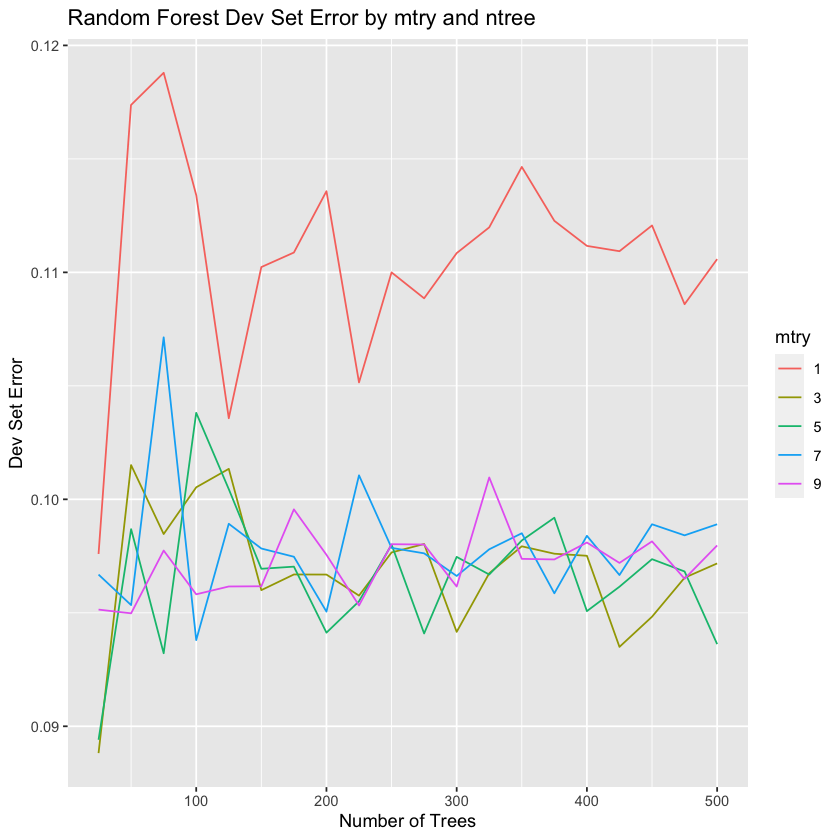

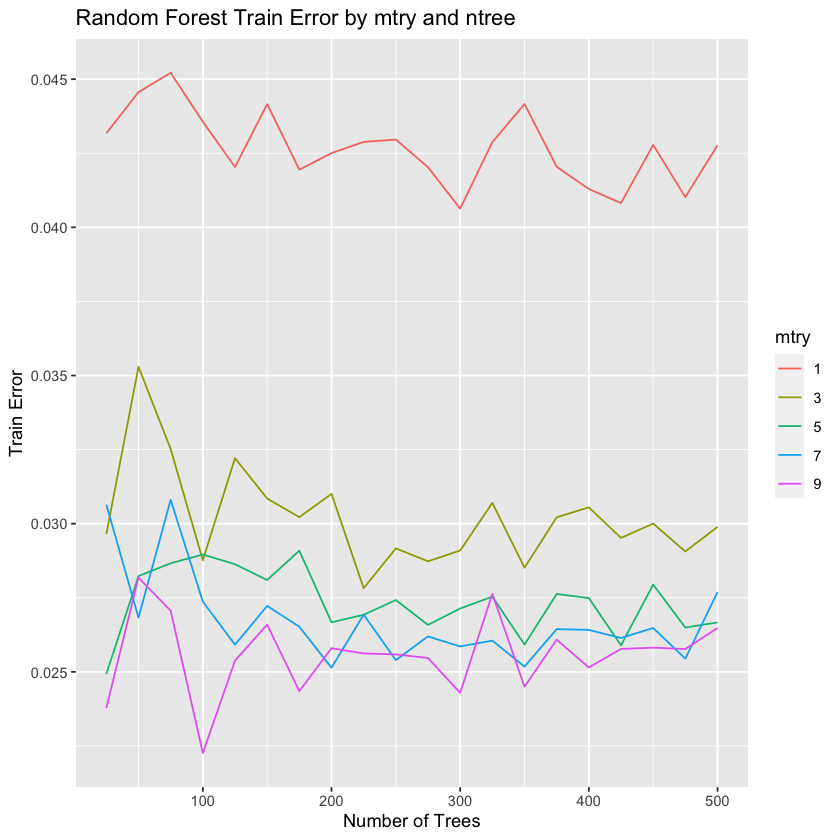

In [ ]:
# Define a range of values for mtry and ntree
mtry_vals <- seq(1, ncol(X_train), by=2)
ntree_vals <- seq(25, 500, by=25)

# Initialize data frames to store results
dev_results <- data.frame(mtry=numeric(), ntree=numeric(), error=numeric())
train_results <- data.frame(mtry=numeric(), ntree=numeric(), error=numeric())

# Loop over mtry and ntree values and train random forest models
for (mtry_val in mtry_vals) {
  for (ntree_val in ntree_vals) {
    # Train random forest
    rf <- randomForest(x=X_train, y=y_train, mtry=mtry_val, ntree=ntree_val, importance=TRUE)
    # Predict on dev set
    y_pred_dev <- predict(rf, newdata=X_dev)
    # Calculate RMSE on dev set
    rmse_dev <- sqrt(mean((y_dev-y_pred_dev)^2))
    # Store results
    dev_results <- rbind(dev_results, data.frame(mtry=mtry_val, ntree=ntree_val, error=rmse_dev))
    # Predict on train set
    y_pred_train <- predict(rf, newdata=X_train)
    # Calculate RMSE on train set
    rmse_train <- sqrt(mean((y_train-y_pred_train)^2))
    # Store results
    train_results <- rbind(train_results, data.frame(mtry=mtry_val, ntree=ntree_val, error=rmse_train))
  }
}

# melt data frames for plotting
dev_results_melt <- reshape2::melt(dev_results, id.vars = c("mtry", "ntree"), variable.name = "set", value.name = "error")
train_results_melt <- reshape2::melt(train_results, id.vars = c("mtry", "ntree"), variable.name = "set", value.name = "error")

# plot dev set error
ggplot(dev_results_melt, aes(x=ntree, y=error, color=factor(mtry))) + 
  geom_line() + 
  scale_color_discrete(name = "mtry") +
  xlab("Number of Trees") + 
  ylab("Dev Set Error") + 
  ggtitle("Random Forest Dev Set Error by mtry and ntree")

# plot train error
ggplot(train_results_melt, aes(x=ntree, y=error, color=factor(mtry))) + 
  geom_line() + 
  scale_color_discrete(name = "mtry") +
  xlab("Number of Trees") + 
  ylab("Train Error") + 
  ggtitle("Random Forest Train Error by mtry and ntree")

From the plots, we can see that as ntree increases, the dev set error tends to decrease and then level off, while the train error continues to decrease. This is typical behavior for random forests, where increasing the number of trees can improve performance on the dev set up to a certain point, but beyond that point, additional trees may not provide much benefit and can increase the risk of overfitting.

We can also see that for a given value of ntree, the dev set error tends to decrease as mtry increases, while the train error tends to increase. This is because increasing mtry makes the individual trees in the forest more decorrelated, which can improve generalization performance, but also makes the trees more variable, which can increase overfitting.

There apperars to be overfitting in the model, as the training set error is much lower than the dev set error. This is expected, as the model is trained to minimize training set error, and so will tend to overfit the training set. However, the dev set error is still relatively low, so the model is still performing well on the dev set.

In [ ]:
best_model = dev_results[which.min(dev_results$error),]

In [ ]:
best_model

,mtry,ntree,error
,<dbl>,<dbl>,<dbl>
21,3,25,0.08881803


In [ ]:
#best model on test set
random_forest_best_model <- randomForest(x=X_train, y=y_train, mtry=best_model$mtry, ntree=best_model$ntree, importance=TRUE)

In [ ]:
test_pred = predict(random_forest_best_model, newdata=X_test)

In [ ]:
rmse = sqrt(mean((y_test - test_pred)^2))

In [ ]:
cat("RMSE for random forest model is: ", rmse)

RMSE for random forest model is:  0.08925188

In [ ]:
#Variable importance plot

var_Imp = varImp(random_forest_best_model)

In [ ]:
var_Imp

,Overall
,<dbl>
HDI_Rank,4.9434915
Country,0.4115430
Maternal_Mortality_Ratio,4.5536035
Adolescent_Birth_Rate,3.3970971
Women_share_of_Seats_in_Parliament,0.6794271
Female_Population_with_Some_Secondary_Education,5.2463960
Male_Population_with_Some_Secondary_Education,4.1173064
Female_Labour_Force_Participation_Rate,2.6769993
Male_Labour_Force_Participation_Rate,4.3885133


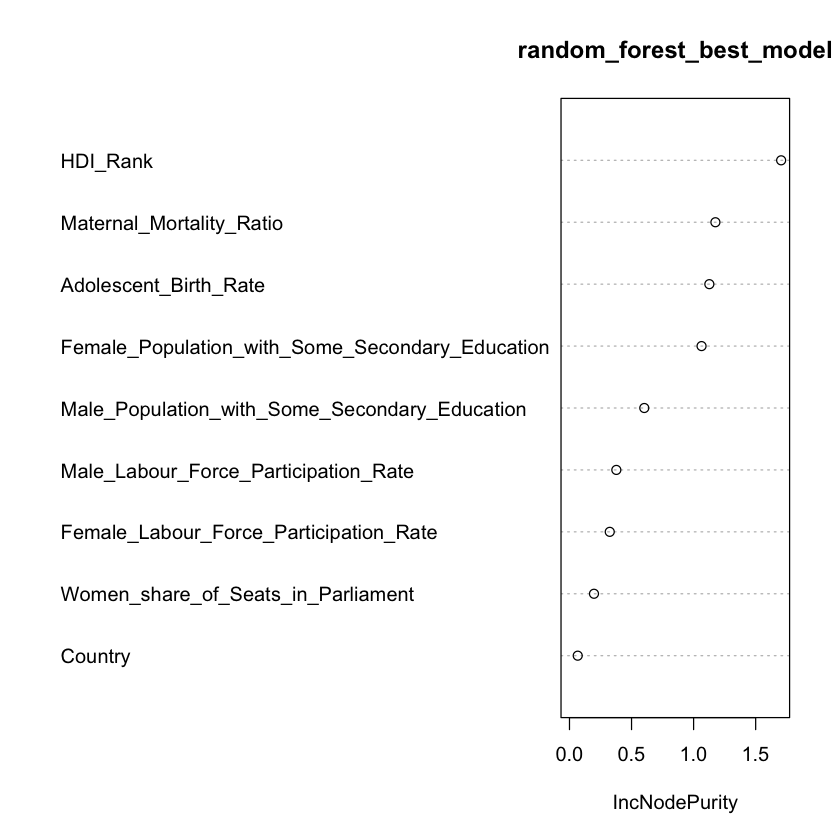

In [ ]:
varImpPlot(random_forest_best_model,type=2)